## 1. 데이터 확인

## 필수 라이브러리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

###폰트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## 데이터 읽어오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 파일 경로 설정
train_path = "/content/drive/MyDrive/lg_aimers/train.csv"
test_path = "/content/drive/MyDrive/lg_aimers/test.csv"
excel_path = "/content/drive/MyDrive/lg_aimers/데이터 명세.xlsx"

pd.set_option('display.max_columns', None)

# 데이터 읽어오기
train_data = pd.read_csv(train_path)

train_data

,ID,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRAIN_000000,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRAIN_000001,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRAIN_000002,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,0회,1회,0회,0회,0회,0회,0회,0회,0회,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRAIN_000003,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,1회,1회,0회,0회,0회,0회,0회,0회,0회,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRAIN_000004,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256346,TRAIN_256346,TRYBLT,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,현재 시술용,3회,3회,3회,0회,0회,0회,0회,0회,0회,0회,5.0,8.0,5.0,2.0,2.0,0.0,0.0,0.0,0.0,11.0,0.0,8.0,8.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,5.0,NaN,0
256347,TRAIN_256347,TRYBLT,만38-39세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,4회,4회,4회,0회,2회,2회,0회,2회,2회,0회,3.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,3.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,1
256348,TRAIN_256348,TRVNRY,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,1회,1회,1회,0회,0회,0회,0회,0회,0회,0회,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,10.0,0.0,6.0,6.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
256349,TRAIN_256349,TRZKPL,만38-39세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,현재 시술용,2회,2회,2회,0회,0회,0회,0회,0회,0회,0회,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,2.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,NaN,1


## 데이터 프레임 정보

In [ ]:
print("수치형 변수 통계")
train_data.describe()

수치형 변수 통계


,임신 시도 또는 마지막 임신 경과 연수,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
count,9370.000000,256351.000000,250060.000000,2718.0,250060.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.0,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,250060.000000,250060.000000,250060.00000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,2179.0,1929.0,198863.0,1436.000000,202616.000000,212785.000000,40369.000000,256351.000000
mean,9.270651,0.771286,0.233476,1.0,0.012781,0.028516,0.013115,0.030724,0.012432,0.033068,0.008765,0.250730,0.138704,0.372403,0.130392,0.0,0.000039,0.071394,0.001077,0.000004,0.000378,0.000558,5.061145,4.170799,2.84365,1.368156,0.724718,1.185975,0.612933,0.454571,0.046401,8.563717,0.093418,7.698928,7.107326,0.534728,0.160465,0.840342,0.009830,0.004195,1.0,1.0,0.0,0.001393,0.005385,3.254741,0.045629,0.258349
std,3.550313,0.420005,0.423043,0.0,0.112328,0.166441,0.113767,0.172568,0.110805,0.178814,0.093212,0.433434,0.345638,0.483446,0.336734,0.0,0.006246,0.257483,0.032795,0.001975,0.019449,0.023612,4.664337,5.625943,4.09464,0.771961,0.894352,2.502318,1.842522,1.415320,0.688246,7.317230,1.105882,6.451914,6.532466,2.509487,0.367038,0.366289,0.098656,0.064633,0.0,0.0,0.0,0.037307,0.111504,1.715697,0.418672,0.437728
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,2.000000,0.000000,0.000000
50%,9.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,7.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,3.000000,0.000000,0.000000
75%,11.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,7.000000,5.00000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,13.000000,0.000000,11.000000,11.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,5.000000,0.000000,1.000000
max,20.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,51.000000,51.000000,43.00000,3.000000,3.000000,51.000000,51.000000,32.000000,36.000000,51.000000,51.000000,51

In [ ]:
print("범주형 변수 통계")
train_data.describe(include="object")

범주형 변수 통계


,ID,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 유도 유형,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이
count,256351,256351,256351,256351,256349,256351,250060,256351,256351,256351,256351,256351,256351,256351,256351,256351,256351,256351,256351,256351,256351
unique,256351,7,7,2,24,4,13,7,7,7,7,7,7,6,7,6,5,3,4,5,7
top,TRAIN_000000,TRDQAZ,만18-34세,IVF,ICSI,기록되지 않은 시행,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,본인 제공,배우자 제공,알 수 없음,알 수 없음
freq,1,38969,102476,250060,122368,194432,233732,97599,121675,103934,242464,205426,208292,253302,218555,220831,254009,234291,229199,242381,230518


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

In [ ]:
train_data.shape

(256351, 69)

In [ ]:
train_data.columns

Index(['ID', '시술 시기 코드', '시술 당시 나이', '임신 시도 또는 마지막 임신 경과 연수', '시술 유형',
       '특정 시술 유형', '배란 자극 여부', '배란 유도 유형', '단일 배아 이식 여부', '착상 전 유전 검사 사용 여부',
       '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인',
       '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 난관 질환',
       '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 여성 요인', '불임 원인 - 자궁경부 문제',
       '불임 원인 - 자궁내막증', '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인',
       '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태', '배아 생성 주요 이유', '총 시술 횟수',
       '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수',
       'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '총 생성 배아 수',
       '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수',
       '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수',
       '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '난자 출처', '정자 출처',
       '난자 기증자 나이', '정자 기증자 나이', '동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부',
       '대리모 여부', 'PGD 시술 여부', 'PGS 시술 여부

In [ ]:
train_data.dtypes

,0
ID,object
시술 시기 코드,object
시술 당시 나이,object
임신 시도 또는 마지막 임신 경과 연수,float64
시술 유형,object
...,...
난자 해동 경과일,float64
난자 혼합 경과일,float64
배아 이식 경과일,float64
배아 해동 경과일,float64


In [ ]:
print("중복 데이터 개수:", train_data.duplicated().sum())

중복 데이터 개수: 0


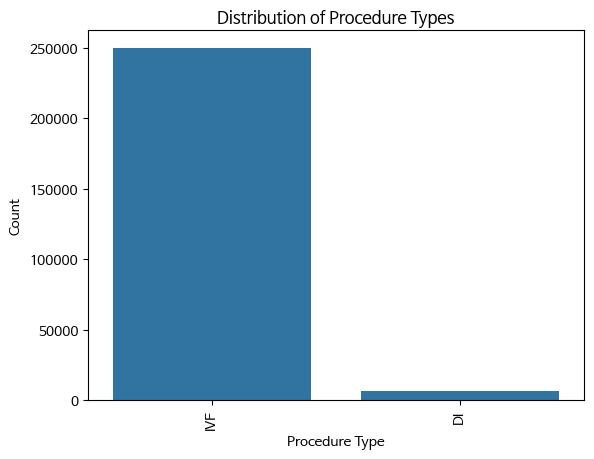

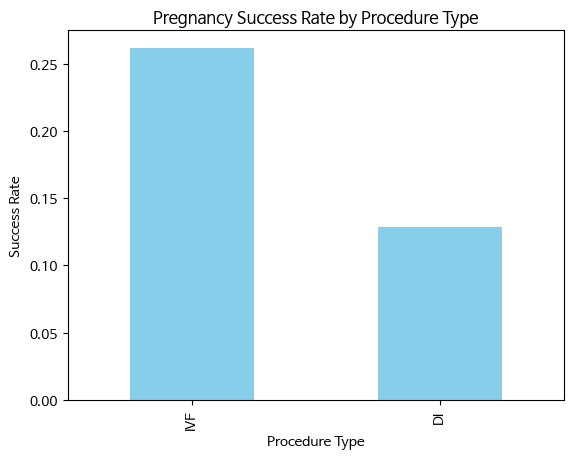

In [ ]:
# '시술 유형' 분포 확인
sns.countplot(x=train_data["시술 유형"], order=train_data["시술 유형"].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Procedure Type")
plt.ylabel("Count")
plt.title("Distribution of Procedure Types")
plt.show()

# 시술 유형별 임신 성공률 비교
success_rate = train_data.groupby("시술 유형")["임신 성공 여부"].mean()
success_rate.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.xlabel("Procedure Type")
plt.ylabel("Success Rate")
plt.title("Pregnancy Success Rate by Procedure Type")
plt.show()

## 중요도 높은 컬럼 확인

In [ ]:
# 타겟 변수 확인
print(train_data["임신 성공 여부"].value_counts())  # 0(실패) vs 1(성공) 개수 확인
print(train_data["임신 성공 여부"].value_counts(normalize=True))  # 비율 확인

임신 성공 여부
0    190123
1     66228
Name: count, dtype: int64
임신 성공 여부
0    0.741651
1    0.258349
Name: proportion, dtype: float64


<ipython-input-24-1d67196db5a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data["임신 성공 여부"], palette="pastel")  # 0과 1의 분포


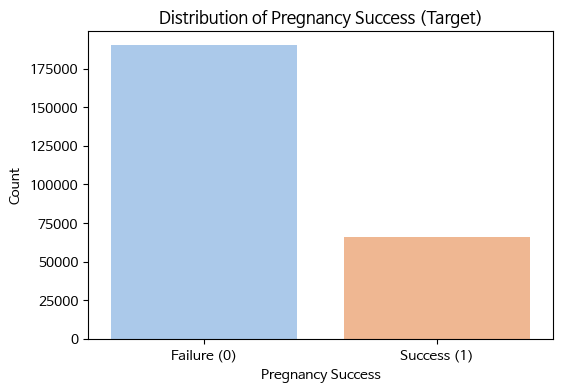

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=train_data["임신 성공 여부"], palette="pastel")  # 0과 1의 분포
plt.title("Distribution of Pregnancy Success (Target)")  # 그래프 제목
plt.xlabel("Pregnancy Success")  # x축 - 임신 성공 여부
plt.ylabel("Count")  # y축 - 개수
plt.xticks(ticks=[0, 1], labels=["Failure (0)", "Success (1)"])  # x축 라벨 설정
plt.show()

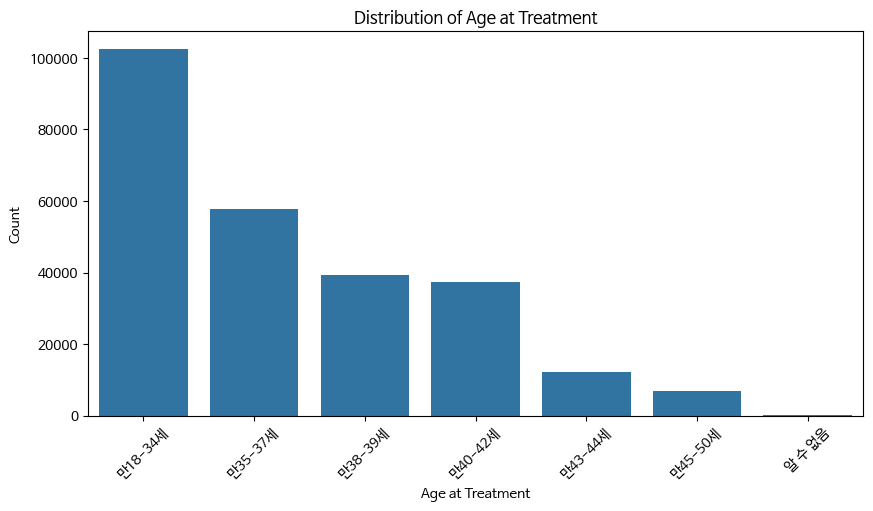

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=train_data["시술 당시 나이"], order=train_data["시술 당시 나이"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Age at Treatment")
plt.ylabel("Count")
plt.title("Distribution of Age at Treatment")
plt.show()

In [ ]:
# 남성 불임 원인의 분포 확인
male_infertility_counts = train_data["불임 원인 - 남성 요인"].value_counts()
male_infertility_ratio = train_data["불임 원인 - 남성 요인"].value_counts(normalize=True) * 100

# 출력
print("남성 불임 원인 분포 (카운트)")
print(male_infertility_counts)
print("\n남성 불임 원인 비율 (%)")
print(male_infertility_ratio)

남성 불임 원인 분포 (카운트)
불임 원인 - 남성 요인
0    160885
1     95466
Name: count, dtype: int64

남성 불임 원인 비율 (%)
불임 원인 - 남성 요인
0    62.759654
1    37.240346
Name: proportion, dtype: float64


<ipython-input-33-3903613f5d50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="불임 원인 - 남성 요인", palette="coolwarm")


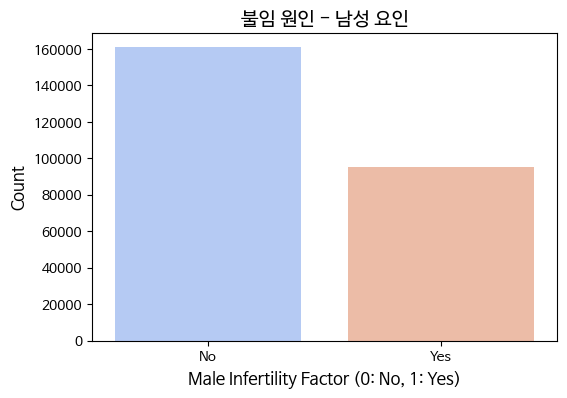

In [ ]:
# 그래프 설정
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x="불임 원인 - 남성 요인", palette="coolwarm")

# 그래프 제목 및 라벨
plt.title("불임 원인 - 남성 요인", fontsize=14)
plt.xlabel("Male Infertility Factor (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])  # X축 레이블 변경
plt.show()

In [ ]:
# 범주형 변수만 추출하여 고유값 개수 확인
categorical_cols = train_data.select_dtypes(include=["object"]).columns

# 각 범주형 변수별 유니크한 값 개수 출력
unique_counts = train_data[categorical_cols].nunique().sort_values(ascending=False)
print(unique_counts)

ID               256351
특정 시술 유형             24
배아 생성 주요 이유          13
IVF 시술 횟수             7
총 출산 횟수               7
IVF 임신 횟수             7
총 임신 횟수               7
시술 시기 코드              7
DI 시술 횟수              7
클리닉 내 총 시술 횟수         7
총 시술 횟수               7
시술 당시 나이              7
정자 기증자 나이             7
DI 임신 횟수              6
IVF 출산 횟수             6
DI 출산 횟수              5
난자 기증자 나이             5
배란 유도 유형              4
정자 출처                 4
난자 출처                 3
시술 유형                 2
dtype: int64


In [ ]:
import pandas as pd

# 컬럼별 결측치 개수 확인
missing_values = train_data.isnull().sum()

# 전체 데이터 대비 결측치 비율 계산
missing_ratio = (missing_values / len(train_data)) * 100

# 결측치가 있는 컬럼만 출력
missing_data = pd.DataFrame({'Missing Count': missing_values, 'Missing Ratio (%)': missing_ratio})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(by="Missing Ratio (%)", ascending=False)

# 결과 출력
print(missing_data)

                       Missing Count  Missing Ratio (%)
난자 해동 경과일                     254915          99.439831
PGS 시술 여부                     254422          99.247516
PGD 시술 여부                     254172          99.149994
착상 전 유전 검사 사용 여부              253633          98.939735
임신 시도 또는 마지막 임신 경과 연수         246981          96.344855
배아 해동 경과일                     215982          84.252451
난자 채취 경과일                      57488          22.425503
난자 혼합 경과일                      53735          20.961494
배아 이식 경과일                      43566          16.994667
총 생성 배아 수                       6291           2.454057
기증자 정자와 혼합된 난자 수                6291           2.454057
단일 배아 이식 여부                     6291           2.454057
착상 전 유전 진단 사용 여부                6291           2.454057
배아 생성 주요 이유                     6291           2.454057
대리모 여부                          6291           2.454057
기증 배아 사용 여부                     6291           2.454057
신선 배아 사용 여부                     6291           2

📌 배란 장애 분포 (카운트)
불임 원인 - 배란 장애
0    222925
1     33426
Name: count, dtype: int64

📌 배란 장애 비율 (%)
불임 원인 - 배란 장애
0    86.960847
1    13.039153
Name: proportion, dtype: float64


<ipython-input-32-28856eb1f6c5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_values.index, y=count_values.values, palette=["lightblue", "salmon"])


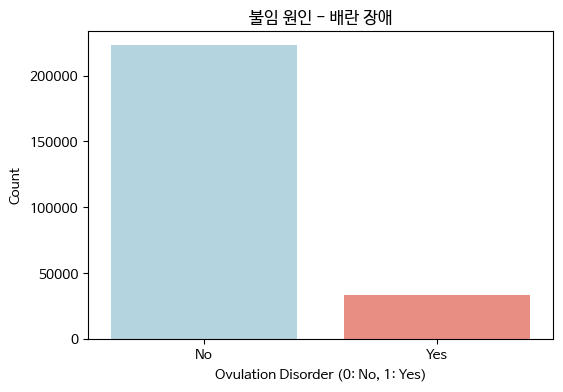

In [ ]:
# '불임 원인 - 배란 장애' 변수명 확인
column_name = "불임 원인 - 배란 장애"

# 값 개수 확인
count_values = train_data[column_name].value_counts()
proportion_values = train_data[column_name].value_counts(normalize=True) * 100

# 출력
print("📌 배란 장애 분포 (카운트)")
print(count_values)

print("\n📌 배란 장애 비율 (%)")
print(proportion_values)

# 시각화
plt.figure(figsize=(6,4))
sns.barplot(x=count_values.index, y=count_values.values, palette=["lightblue", "salmon"])
plt.xticks([0,1], ["No", "Yes"])
plt.xlabel("Ovulation Disorder (0: No, 1: Yes)")
plt.ylabel("Count")
plt.title("불임 원인 - 배란 장애")
plt.show()

📊 '불임 원인 - 여성 요인' 분포 (카운트)
불임 원인 - 여성 요인
0    256351
Name: count, dtype: int64

📊 '{column_name}' 비율 (%)
불임 원인 - 여성 요인
0    100.0
Name: count, dtype: float64


<ipython-input-31-aa5e62682c9c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=["lightblue", "salmon"])
<ipython-input-31-aa5e62682c9c>:20: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, palette=["lightblue", "salmon"])


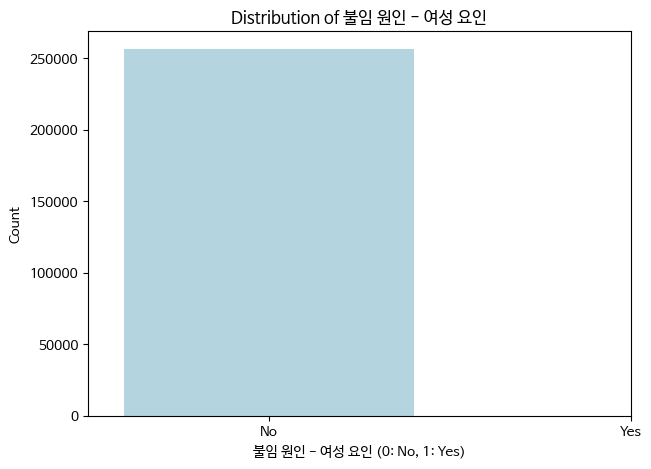

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (train_data가 이미 로드되어 있다고 가정)
column_name = "불임 원인 - 여성 요인"

# 분포 확인 (카운트)
value_counts = train_data[column_name].value_counts().sort_index()
proportion = (value_counts / value_counts.sum()) * 100

# 결과 출력
print(f"📊 '{column_name}' 분포 (카운트)")
print(value_counts)
print("\n📊 '{column_name}' 비율 (%)")
print(proportion)

# 시각화
plt.figure(figsize=(7,5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette=["lightblue", "salmon"])
plt.xlabel(f"{column_name} (0: No, 1: Yes)")
plt.ylabel("Count")
plt.title(f"Distribution of {column_name}")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.show()

<ipython-input-34-b90751daf207>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, palette=["skyblue", "salmon"])


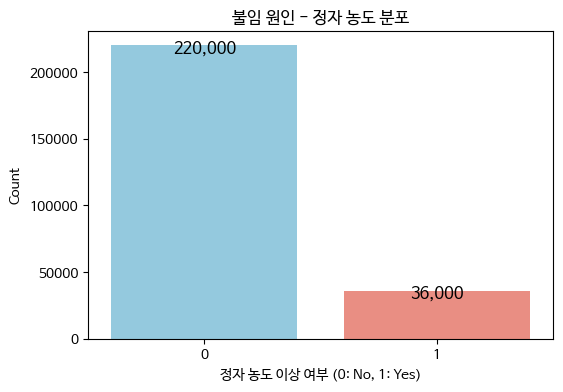

   불임 원인 - 정자 농도   Count  Percentage (%)
0              0  220000         85.9375
1              1   36000         14.0625


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 예제 데이터 (실제 데이터 사용 시 df를 데이터셋으로 변경)
df = pd.DataFrame({
    "불임 원인 - 정자 농도": [0] * 220000 + [1] * 36000  # 예제 데이터 (0: 85.94%, 1: 14.06%)
})

# ✅ 데이터 분포 계산
value_counts = df["불임 원인 - 정자 농도"].value_counts().sort_index()
percentages = (value_counts / value_counts.sum()) * 100

# ✅ 데이터프레임으로 정리
summary_df = pd.DataFrame({
    "불임 원인 - 정자 농도": value_counts.index,
    "Count": value_counts.values,
    "Percentage (%)": percentages.values
}).sort_values("불임 원인 - 정자 농도")

# ✅ 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, palette=["skyblue", "salmon"])
plt.xlabel("정자 농도 이상 여부 (0: No, 1: Yes)")
plt.ylabel("Count")
plt.title("불임 원인 - 정자 농도 분포")

# ✅ 그래프 위에 숫자 표시
for i, v in enumerate(value_counts.values):
    plt.text(i, v - 5000, f"{v:,}", ha='center', fontsize=12)

plt.show()

# ✅ 데이터 요약 출력
print(summary_df)

📊 '불임 원인 - 정자 운동성' 분포 (카운트)
불임 원인 - 정자 운동성
0    256254
1        97
Name: count, dtype: int64

📊 '{column_name}' 비율 (%)
불임 원인 - 정자 운동성
0    99.962161
1     0.037839
Name: count, dtype: float64


<ipython-input-35-7d008a7c3c56>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=["lightblue", "salmon"])


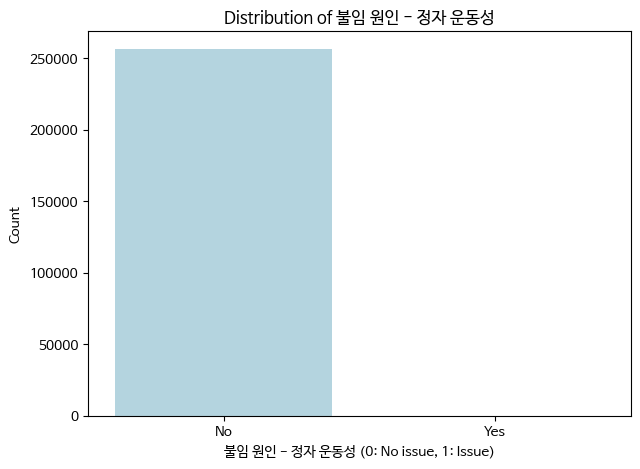

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 변수명 설정
column_name = "불임 원인 - 정자 운동성"

# 데이터 분포 확인
value_counts = train_data[column_name].value_counts().sort_index()
proportion = (value_counts / value_counts.sum()) * 100

# 결과 출력
print(f"📊 '{column_name}' 분포 (카운트)")
print(value_counts)
print("\n📊 '{column_name}' 비율 (%)")
print(proportion)

# 시각화
plt.figure(figsize=(7,5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette=["lightblue", "salmon"])
plt.xlabel(f"{column_name} (0: No issue, 1: Issue)")
plt.ylabel("Count")
plt.title(f"Distribution of {column_name}")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.show()

In [ ]:
# 총 시술 횟수 분포 확인
count_data = train_data['총 시술 횟수'].value_counts().sort_index()
proportion_data = (count_data / count_data.sum()) * 100

# 결과 출력
print("'총 시술 횟수' 분포 (카운트)")
display(count_data)

print("\n'총 시술 횟수' 비율 (%)")
display(proportion_data)

'총 시술 횟수' 분포 (카운트)


,count
총 시술 횟수,
0회,97599
1회,56819
2회,39338
3회,24531
4회,15141
5회,9106
6회 이상,13817



'총 시술 횟수' 비율 (%)


,count
총 시술 횟수,
0회,38.072409
1회,22.164532
2회,15.345366
3회,9.569301
4회,5.906355
5회,3.552161
6회 이상,5.389876


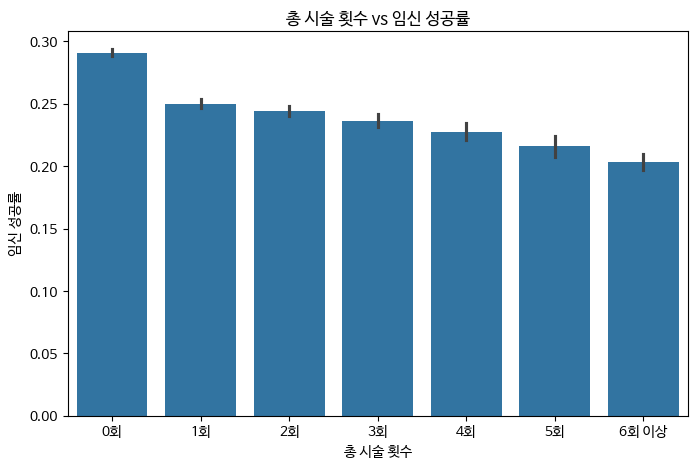

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    x=train_data['총 시술 횟수'],
    y=train_data['임신 성공 여부'],
    order=['0회', '1회', '2회', '3회', '4회', '5회', '6회 이상'],
    estimator=lambda x: sum(x)/len(x) # 성공률 계산
)
plt.xlabel("총 시술 횟수")
plt.ylabel("임신 성공률")
plt.title("총 시술 횟수 vs 임신 성공률")
plt.show()